3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

4. At the bottom of your imports cell, use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [93]:
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

    Take a look at the first 10 rows.
    Look at the last 5 rows. Do you see a problem?
    Redo the read_csv() call to correct this issue - do not modify the original csv file

In [3]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [5]:
gdp_df[:9]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN


In [6]:
gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [7]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [8]:
gdp_df.drop(index=[6729,6730])

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
...,...,...,...,...
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN


In [9]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv' , skipfooter=2)

<ipython-input-9-c5e928b73d2e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv('../data/gdp_per_capita.csv' , skipfooter=2)


In [10]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [11]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [12]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [13]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834




7.How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.


In [15]:
gdp_df.shape

(6729, 3)

In [16]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


8. 

Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?


In [17]:
gdp_df['Year'].min()

1990

In [18]:
gdp_df['Year'].max()

2018

In [19]:
print(gdp_df['Year'])

0       2018
1       2017
2       2016
3       2015
4       2014
        ... 
6724    1994
6725    1993
6726    1992
6727    1991
6728    1990
Name: Year, Length: 6729, dtype: int64


In [20]:
gdp_df.groupby(['Year']).size()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
dtype: int64

the number of countries involved was much lower in 1990 than the mid 200s and dropped significantly from 2017-2018

9. 

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?


In [21]:
gdp_df.groupby(['Country']).size()

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Length: 243, dtype: int64

In [22]:
country = gdp_df.groupby(['Country']).size().reset_index(name='Counts')

In [23]:
country.sort_values('Counts')

,Country,Counts
51,Djibouti,1
199,South Sudan,8
225,Turks and Caicos Islands,8
191,Sint Maarten (Dutch part),9
153,Nauru,12
...,...,...
91,IBRD only,29
92,IDA & IBRD total,29
93,IDA blend,29
130,"Macao SAR, China",29


there are 243 countries represented. the lesser counted countries might not have been recognized or a part of the UN. they also could have only been countries for a short time before either breaking up or being merged into another existing country



10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.


In [24]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [25]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. 

Use .describe() to find the summary statistics for GDP per capita in 2014.


In [26]:
gdp_2014['GDP_Per_Capita'].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64



12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?


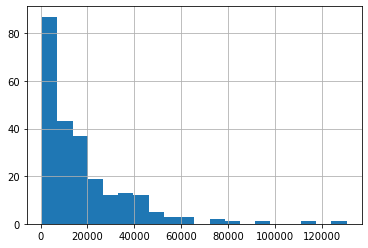

In [27]:
gdp_2014['GDP_Per_Capita'].hist(bins=20)

the distribution of this chart is right leaning.



13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.


In [28]:
gdp_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329
...,...,...,...
3697,Malawi,2014,1142.530804
4414,Niger,2014,900.136918
1375,Dem. Rep. Congo,2014,784.872656
794,Burundi,2014,768.469837


top 5 GDP countries: China, Qatar, Luxembourg, Singapore, Brunei

bottom 5 GDP countries: Malawi, Niger, Dem. Rep. Congo, Burundi, Central African Republic

14. 

Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.


In [29]:
gdp_pivoted = gdp_df.pivot_table(values='GDP_Per_Capita',index='Country',columns='Year',dropna=True)

In [30]:
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896


In [31]:
gdp_pivoted[1990]

Country
Afghanistan                     NaN
Albania                 4458.247115
Algeria                10300.015042
Angola                  4761.229638
Antigua and Barbuda    17454.549799
                           ...     
West Bank and Gaza              NaN
World                   8966.014072
Yemen                   3425.707169
Zambia                  2339.137959
Zimbabwe                2819.549467
Name: 1990, Length: 243, dtype: float64

In [32]:
gdp_pivoted = gdp_pivoted[[1990,2017]]

In [33]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562


In [34]:
gdp_pivoted = gdp_pivoted.dropna()

15. 

Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.


In [35]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[1990]



16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?


In [36]:
gdp_pivoted[gdp_pivoted['Percent_Change']<0].count()

Year
1990              20
2017              20
Percent_Change    20
dtype: int64

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [37]:
gdp_pivoted['Percent_Change'].max()

2090.973464237512

In [38]:
gdp_pivoted['Percent_Change'].sort_values()

Country
Dem. Rep. Congo                                 -41.759785
United Arab Emirates                            -40.829500
Burundi                                         -34.710993
Yemen                                           -29.812379
Ukraine                                         -24.440266
                                                  ...     
East Asia & Pacific (IDA & IBRD)                509.209651
East Asia & Pacific (excluding high income)     509.437318
Myanmar                                         668.297629
China                                           902.257241
Equatorial Guinea                              2090.973464
Name: Percent_Change, Length: 209, dtype: float64

Equatorial Guinea had the biggest percent change at 2090% growth

TO LEXA: This below is me trying something different but it's not what I want to hand in/isn't ready yet.

In [39]:
EG_China_gdp = gdp_df[(gdp_df['Country']=='Equatorial Guinea')|(gdp_df['Country']=='China')]

In [40]:
EG_China_gdp['Country'].unique()

array(['China', 'Equatorial Guinea'], dtype=object)

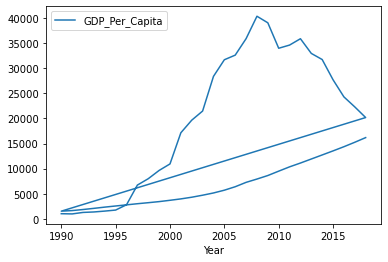

In [41]:
EG_China_gdp.plot(x='Year',y='GDP_Per_Capita')

TO LEXA: This is what I have working so far

In [42]:
Equatorial_Guinea = gdp_df[gdp_df['Country']=='Equatorial Guinea']

In [43]:
China_gdp = gdp_df[gdp_df['Country']=='China']

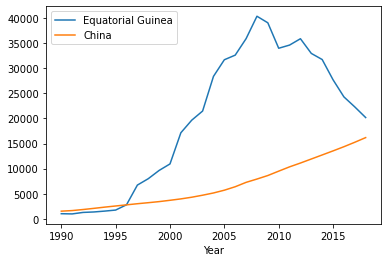

In [44]:
ax = Equatorial_Guinea.plot(x='Year',y='GDP_Per_Capita',label='Equatorial Guinea')
China_gdp.plot(ax=ax,x='Year',y='GDP_Per_Capita',label='China');

both have had steady growth from 1990-around 2008 however Equatorial Guinea has seen much larger growth as their y axis (GDP per capita) starts at almost 0 and shoots up to 40,000 at its peak. China starts around 2000 and has been slowly growing towards 16,0000. The range of the two graphs is vastly different.



18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.


In [45]:
continents = pd.read_csv('../data/continents.csv')



19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.


In [46]:
gdp_df = gdp_df.merge(continents, on='Country')

In [47]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia




20. Determine the number of countries per continent. Create a bar chart showing this.


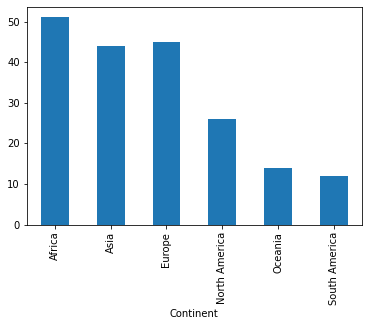

In [48]:
gdp_df.groupby(['Continent'])['Country'].nunique().plot(kind='bar');



21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?


In [49]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

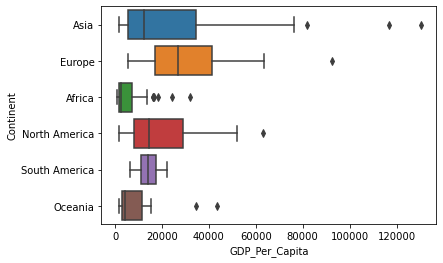

In [50]:
sns.boxplot(y='Continent',x='GDP_Per_Capita',data=gdp_2014);

Asia has a few very high outliers whereas Europe, North America, and South America seem to have similar GDPs. Africa, South America, and Oceania all have fairly small boxes meaning their country's GDPs are the most similar to each other.



22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.


In [51]:
internet_df = pd.read_csv('../data/internet_use.csv',error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


In [52]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [53]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


In [54]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4675 non-null   object 
 1   Year             4675 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 146.2+ KB


In [55]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


In [57]:
pd.to_numeric(internet_df.Year)

ValueError: Unable to parse string "Footnote" at position 4495

In [58]:
internet_df.iloc[4495:4675].index

RangeIndex(start=4495, stop=4675, step=1)

In [59]:
internet_df = internet_df.drop(index=internet_df.iloc[4495:4675].index)

In [60]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN




23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.


In [61]:
internet_df = internet_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'}).drop(columns='Value Footnotes')



24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.


In [62]:
internet_df.shape

(4495, 3)

In [63]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.5+ KB




25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.


In [64]:
internet_df.groupby(['Year'])['Internet_Users_Pct'].agg('mean')

Year
1960     0.000000
1965     0.000000
1970     0.000000
1975     0.000000
1976     0.000000
1977     0.000000
1978     0.000000
1979     0.000000
1980     0.000000
1981     0.000000
1982     0.000000
1983     0.000000
1984     0.000000
1985     0.000000
1986     0.000000
1987     0.000000
1988     0.000000
1989     0.000000
1990     0.023966
1991     0.280305
1992     0.399037
1993     0.463765
1994     0.665616
1995     0.954541
1996     1.446573
1997     2.472267
1998     3.948702
1999     5.922159
2000     8.886166
2001    10.939164
2002    13.930060
2003    16.586213
2004    19.066754
2005    21.286577
2006    23.918903
2007    25.680517
2008    28.502317
2009    31.223642
2010    34.283033
2011    37.582153
2012    40.353926
2013    42.842633
2014    45.249851
Name: Internet_Users_Pct, dtype: float64

1990 is the first year that reports a nonzero percentage of internet users

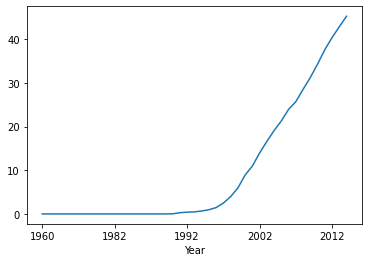

In [65]:
internet_df.groupby(['Year'])['Internet_Users_Pct'].agg('mean').plot()

26. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.
Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [66]:
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country','Year'])

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [67]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5334 non-null   object 
 1   Year            5334 non-null   int64  
 2   GDP_Per_Capita  5334 non-null   float64
 3   Continent       5334 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 208.4+ KB


In [68]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 140.5+ KB


In [69]:
internet_df['Year'] = internet_df['Year'].astype(int)

In [70]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int32  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 122.9+ KB


In [71]:
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country','Year'])



27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.


In [72]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [73]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000




28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?


In [74]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']== 2014]

In [75]:
gdp_and_internet_use_2014['Internet_Users_Pct'].agg('mean')

44.673536463414635

In [76]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>=90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64



29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?


In [77]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.670676,Asia,78.70
2310,Norway,2014,63328.259526,Europe,96.30
...,...,...,...,...,...
1765,Liberia,2014,1257.625441,Africa,5.41
2116,Mozambique,2014,1222.452874,Africa,5.94
1856,Malawi,2014,1142.530804,Africa,5.83
2270,Niger,2014,900.136918,Africa,1.95


In [94]:
top_3 = internet_df[(internet_df['Country']=='Qatar')|(internet_df['Country']=='Luxembourg')|(internet_df['Country']=='Singapore')]

In [95]:
top_3.head()

,Country,Year,Internet_Users_Pct
2407,Luxembourg,2014,94.670000
2408,Luxembourg,2013,93.776500
2409,Luxembourg,2012,91.949924
2410,Luxembourg,2011,90.029859
2411,Luxembourg,2010,90.620000


In [96]:
top_3.tail()

,Country,Year,Internet_Users_Pct
3576,Singapore,1994,1.185204
3577,Singapore,1993,0.763278
3578,Singapore,1992,0.471368
3579,Singapore,1991,0.161504
3580,Singapore,1990,0.000000


In [97]:
top_3.shape

(70, 3)

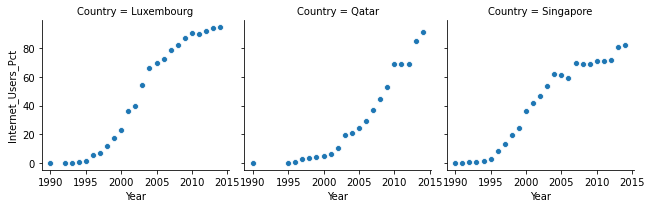

In [102]:
g = sns.FacetGrid(top_3, col='Country')
g.map(sns.scatterplot, "Year", "Internet_Users_Pct")

Every country's internet users percentage went up in a similar line shape. Both Qatar and Singapore seemed to have none to little change in users during 2009-2011.



30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?


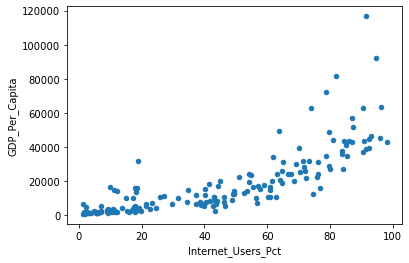

In [105]:
gdp_and_internet_use_2014.plot(kind='scatter', x='Internet_Users_Pct', y='GDP_Per_Capita');

There seems to be a moderate positive relationship between Internet acces and GDP.



31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?


In [128]:
col_1 = gdp_and_internet_use_2014['GDP_Per_Capita']
col_2 = gdp_and_internet_use_2014['Internet_Users_Pct']

In [129]:
np.corrcoef(col_1,col_2)

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

In [130]:
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.787989
Internet_Users_Pct,NaN,0.787989,1.000000


The correlation bewteen GDP per capita and Internet users in 2014 is 0.787989 which shows that there's a moderate to strong correlation between the two.

32. 

Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?


In [135]:
gdp_and_internet_use_2014['log_GDP'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

<ipython-input-135-b7da9885a18a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['log_GDP'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [136]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


In [137]:
col_3 = gdp_and_internet_use_2014['log_GDP']
np.corrcoef(col_2,col_3)

array([[1.       , 0.8844323],
       [0.8844323, 1.       ]])

This shows a slightly stronger correlation between Internet users and the log of GDP Per Capita.



33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?


In [138]:
gdp_and_internet_USA = gdp_and_internet_use[gdp_and_internet_use['Country']== 'United States']

In [141]:
gdp_and_internet_USA.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,1.000000,0.963218,0.969113
GDP_Per_Capita,0.963218,1.000000,0.991618
Internet_Users_Pct,0.969113,0.991618,1.000000


Since the correlation between GDP and Internet users is 0.991618 there is a very strong correlation between the two. However since this is looking at only one country it can't be said to be a trend worldwide with a sample of 1.